In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import Environment
from optimizer import OGD, BGD_1, BGD_2, BGD_k

In [2]:
T = 10000 # Time round
lr = 0.01 # Learning rate
N = 50 # size of available convex functions that environment can choose
d = 10 # Dimension
pr = 0.1 # Purturbation scale (For BGD)


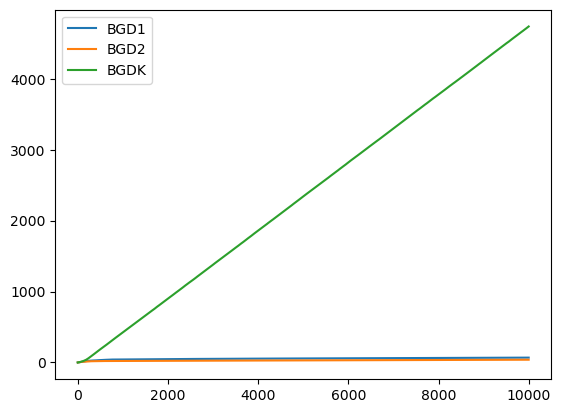

In [3]:
env = Environment(d,T)
ogd = OGD(lr=lr)
bgd_1 = BGD_1(lr=lr, pr=pr, d=d)
bgd_2 = BGD_2(lr=lr, pr=pr, d=d)
bgd_k = BGD_k(lr=lr, pr=pr, d=d, k=d)



x = np.random.random(size=d)
x_ogd = x
x_bgd1 = x
x_bgd2 = x

xs= [x_ogd]
xx= [np.linalg.norm(x_ogd)]

ogd_loss = [0]
bgd1_loss = [0]
bgd1_regret = [0]

bgd2_loss = [0]
bgd2_regret = [0]

bgdk_loss = [0]
bgdk_regret = [0]

for t in range(1,T):

    x_ogd=ogd.choose(env,x_ogd,t)


    x_bgd1=bgd_1.choose(env,t)
    x1_bgd2, x2_bgd2=bgd_2.choose(env,t)
    xs = bgd_k.choose(env,t)

    # ogd_regret.append(env.get_loss_val(t,x_ogd))
    bgd1_loss.append(env.get_loss_val(t,x_bgd1))
    bgd1_regret.append(bgd1_loss[t]+bgd1_regret[t-1])

    bgd2_loss.append(0.5*(env.get_loss_val(t,x1_bgd2)+env.get_loss_val(t,x2_bgd2)))
    bgd2_regret.append(bgd2_loss[t]+bgd2_regret[t-1])

    loss_d = 0
    for i in range(d+1):
        loss_d += env.get_loss_val(t,xs[i])
    loss_d = loss_d/(d+1)
    bgdk_loss.append(loss_d)
    bgdk_regret.append(bgdk_loss[t]+bgdk_regret[t-1])

    


# for t in range(T):
#     # env.choose_loss_ft(t)
#     # next_x=ogd.choose(env,x,t)
#     # ogd_regret.append(env.get_regret(t,next_x)+ogd_regret[t])
#     # x=next_x


# plt.plot(loss)
# plt.plot(bgd1_loss, label='BGD1')
plt.plot(bgd1_regret, label='BGD1')


# plt.plot(bgd2_loss, label='BGD2')
plt.plot(bgd2_regret, label='BGD2')

# plt.plot(bgdk_loss, label='BGDK')
plt.plot(bgdk_regret, label='BGDK')

# plt.plot(bgd2_regret, label='BGD2')
# plt.plot(ogd_regret, label='OGD')
plt.legend()
plt.savefig('ex.png')

# print(xs)
# print(xx)



In [4]:
T, dimension, stage, R, Gamma, scale, seed = 10000, 3, 100, 1, 1, 1 / 2, 0
D, r = 2 * R, R
G = scale * D * Gamma**2
C = scale * 1 / 2 * (D * Gamma)**2
L_lipschitz = scale * D * Gamma**2
L_tilde = 3 * L_lipschitz + L_lipschitz * R / r



step_one_point = (dimension * C * L_tilde)**(-0.5) * (7 * R**2 / T)**0.75
perturb_one_point = (dimension * C / L_tilde)**0.5 * (7 * R**2 / T)**0.25

print(step_one_point)
print(perturb_one_point)


0.0012423183696035186
0.14086566236306286
